# 5 Modelling<a id='5_Modelling'></a>
Justin Jimenez 1/20/2022

The objective of this notebook was to develop various models and evaluate the best model for the application.

# 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modelling](#5_Modelling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Importing](#5.2_Importing)
  * [5.3 Dummy Classifier](#5.3_Dummy_Classifier)
  * [5.4 Logistic Regression](#5.4_Logistic_Regression)
  * [5.5 Decision Tree](#5.5_Decision_Tree)
      * [5.5.1 Gini Tree](#5.5.1_Gini_Tree)
      * [5.5.2 Entropy Tree](#5.5.2_Entropy_Tree)
  * [5.6 Gradient Boost](#5.5_Gradient_Boost)
  * [5.7 Model Comparison](#5.7_Model_Comparison)
      * [5.7.1 Dummy Classifier](#5.7.1_Dummy_Classifier)
      * [5.7.2 Logistic Regression](#5.7.2_Logistic_Regression)
      * [5.7.3 Gini Decision_Tree](#5.7.3_Gini_Decision_Tree)
      * [5.7.4 Entropy_Decision_Tree](#5.7.4_Entropy_Decision_Tree)
      * [5.7.5 Gradient Boosting Classifier](#5.7.5_Gradient_Boosting_Classifier)
  * [5.8 Model Selection](#5.8_Model_Selection)
  * [5.9 Data Quantity Assessment](#5.9_Data_Quantity_Assessment)
  * [5.10 Export](#5.10_Export)
  
      
# 5.2 Importing<a id='5.2_Importing'></a>

In [519]:
import pandas as pd
import numpy as np
import bamboolib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from scipy.stats import uniform
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.tree
import graphviz
from sklearn import __version__ as sklearn_version
import datetime
# from library.sb_utils import save_file

In [520]:
X_train = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\X_train.csv')

In [521]:
X_test = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\X_test.csv')

In [522]:
y_train = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\y_train.csv')

In [523]:
y_test = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\processed\y_test.csv')

# 5.3 Dummy Classifier<a id='5.3_Dummy_Classifier'></a>
[Table of Contents](#5.1_Contents)

First I created a dummy classifier to use as a baseline comparison for the advanced models. On an imbalanced dataset, using a dummy classifier with the 'most frequent' strategy would provide misleading accuracy and poor recall scores. The training set was balanced with SMOTEENN, so the results would not be as poor as that. Nonetheless I opted to use the 'stratified' strategy.

From the sklearn documentation:

“stratified”: the predict_proba method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The predict method returns the class label which got probability one in the one-hot vector of predict_proba. Each sampled row of both methods is therefore independent and identically distributed.

In [524]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [525]:
y_pred = dummy_clf.predict(X_train)

In [526]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61    236823
           1       0.39      0.39      0.39    149550

    accuracy                           0.53    386373
   macro avg       0.50      0.50      0.50    386373
weighted avg       0.53      0.53      0.53    386373



In [527]:
y_pred = dummy_clf.predict(X_test)

In [528]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.61      0.31     85512
           1       0.79      0.39      0.52    332449

    accuracy                           0.43    417961
   macro avg       0.50      0.50      0.41    417961
weighted avg       0.67      0.43      0.48    417961



# 5.4 Logistic Regression<a id='5.4_Logistic_Regression'></a>
[Table of Contents](#5.1_Contents)

In [529]:
class_weight = []
for i in np.linspace(0.5,5,1000):
    class_weight.append({0: i, 1: 1}) 

In [530]:
param_grid=dict(C = np.linspace(0.0000000001,10,1000), penalty = ['l2', 'l1', 'none', 'elasticnet'], 
                class_weight = class_weight)
clf = LogisticRegression(random_state = 42)
clf_cv = RandomizedSearchCV(clf, param_grid, scoring='recall', cv=5)
clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': array([1.00000000e-10, 1.00100101e-02, 2.00200201e-02, 3.00300301e-02,
       4.00400401e-02, 5.00500501e-02, 6.00600602e-02, 7.00700702e-02,
       8.00800802e-02, 9.00900902e-02, 1.00100100e-01, 1.10110110e-01,
       1.20120120e-01, 1.30130130e-01, 1.40140140e-01, 1.50150150e-01,
       1.601601...
                                                         {0: 0.5855855855855856,
                                                          1: 1},
                                                         {0: 0.5900900900900901,
                                                          1: 1},
                                                         {0: 0.5945945945945946,
                                                          1: 1},
                                                         {0: 0.5990990990990991,
                                                          1: 

In [531]:
clf_cv.best_params_

{'penalty': 'l2',
 'class_weight': {0: 0.6531531531531531, 1: 1},
 'C': 8.328328328345044}

In [532]:
y_pred = clf_cv.predict(X_train)

In [533]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.88    236823
           1       0.77      0.91      0.83    149550

    accuracy                           0.86    386373
   macro avg       0.85      0.87      0.85    386373
weighted avg       0.87      0.86      0.86    386373



In [534]:
y_pred = clf_cv.predict(X_test)

In [535]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35     85512
           1       0.83      0.88      0.86    332449

    accuracy                           0.76    417961
   macro avg       0.62      0.60      0.60    417961
weighted avg       0.74      0.76      0.75    417961



### Finalized Logistic Regression Model

In [536]:
clf = LogisticRegression(random_state = 42, penalty = 'none', 
                         class_weight = {0: 2.0315315, 1: 1}, C = 3.5235235).fit(X_train, y_train)

In [537]:
y_pred = clf.predict(X_test)

In [538]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.64      0.44     85512
           1       0.88      0.68      0.77    332449

    accuracy                           0.67    417961
   macro avg       0.61      0.66      0.60    417961
weighted avg       0.77      0.67      0.70    417961



In [539]:
logreg_features = pd.DataFrame()
logreg_features['features'] = X_train.columns
logreg_features['coef'] = clf.coef_[0]
logreg_features = logreg_features.sort_values(by=['coef'], ascending=[False])

In [540]:
logreg_features

,features,coef
30,home_ownership_MORTGAGE,2.163174
33,home_ownership_RENT,1.955560
35,purpose_consolidation,1.687660
36,purpose_credit_card,1.196152
32,home_ownership_OWN,1.133891
19,emp_length_10+ years,0.911371
38,purpose_house,0.800544
42,purpose_other,0.761358
2,installment,0.561698
20,emp_length_2 years,0.518953


# 5.5 Decision Tree<a id='5.5_Decision_Tree'></a>
[Table of Contents](#5.1_Contents)

## 5.5.1 Gini Tree<a id='5.5.1_Gini_Tree'></a>

In [541]:
param_grid = dict(
    class_weight = class_weight,
    max_depth=list(range(2,11)),
    min_samples_leaf=list(range(1,21)),
    min_samples_split=list(range(5,51)),
)
gini_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'gini')
gini_tree_cv = RandomizedSearchCV(gini_tree, param_grid, scoring='recall', cv=5).fit(X_train, y_train)

In [542]:
gini_tree_cv.best_params_

{'min_samples_split': 28,
 'min_samples_leaf': 16,
 'max_depth': 8,
 'class_weight': {0: 0.6441441441441441, 1: 1}}

In [543]:
y_pred = gini_tree_cv.predict(X_train)

In [544]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82    236823
           1       0.69      0.82      0.75    149550

    accuracy                           0.79    386373
   macro avg       0.78      0.79      0.78    386373
weighted avg       0.80      0.79      0.79    386373



In [545]:
y_pred = gini_tree_cv.predict(X_test)

In [546]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.47      0.41     85512
           1       0.85      0.78      0.82    332449

    accuracy                           0.72    417961
   macro avg       0.61      0.63      0.61    417961
weighted avg       0.75      0.72      0.73    417961



### Finalized Gini Decision Tree

In [547]:
gini_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'gini', min_samples_split = 43,
                                                  min_samples_leaf = 6, max_depth = 10, class_weight = {0: 1, 1: 1}
                                                  ).fit(X_train, y_train)

In [548]:
sorted(list(zip(gini_tree.feature_importances_, X_train.columns)), reverse = True)

[(0.3733995431107686, 'int_rate'),
 (0.16671249037823363, 'last_credit_pull_d'),
 (0.057905361001460744, 'emp_length_10+ years'),
 (0.04594694987178046, 'loan_amnt'),
 (0.04031697018097766, 'home_ownership_RENT'),
 (0.028575147445049964, 'home_ownership_MORTGAGE'),
 (0.02809765126262878, 'home_ownership_OWN'),
 (0.022093765877853073, 'emp_length_3 years'),
 (0.02191687657196602, 'emp_length_2 years'),
 (0.02135753502081498, 'emp_length_< 1 year'),
 (0.02134688066093691, 'emp_length_5 years'),
 (0.021073556871929102, 'emp_length_4 years'),
 (0.019904305625066256, 'purpose_consolidation'),
 (0.01846142793266028, 'emp_length_6 years'),
 (0.018347674519640894, 'purpose_house'),
 (0.01624463094314602, 'emp_length_7 years'),
 (0.014515835124504538, 'purpose_credit_card'),
 (0.013988775506778158, 'purpose_other'),
 (0.008127011192689469, 'tot_bal_tot_hi_cred_lim_ratio'),
 (0.007949869134920918, 'annual_inc'),
 (0.007085985778507067, 'purpose_major_purchase'),
 (0.006698170185939485, 'tot_hi_c

In [549]:
## Visualize the decision tree
# dot_data = sklearn.tree.export_graphviz(gini_tree, out_file=None, 
#                      feature_names=X_test.columns,  
#                      class_names=str(gini_tree.classes_),  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph

## 5.5.2 Entropy Tree<a id='5.5.2_Entropy_Tree'></a>
[Table of Contents](#5.1_Contents)

In [550]:
param_grid = dict(
    class_weight = class_weight,
    max_depth=list(range(2,11)),
    min_samples_leaf=list(range(1,21)),
    min_samples_split=list(range(5,51)),
)
entropy_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'entropy')
entropy_tree_cv = RandomizedSearchCV(entropy_tree, param_grid, scoring='recall', cv=5).fit(X_train, y_train)

In [551]:
entropy_tree_cv.best_params_

{'min_samples_split': 37,
 'min_samples_leaf': 15,
 'max_depth': 8,
 'class_weight': {0: 1.0225225225225225, 1: 1}}

In [552]:
y_pred = entropy_tree_cv.predict(X_train)

In [553]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    236823
           1       0.77      0.71      0.74    149550

    accuracy                           0.81    386373
   macro avg       0.80      0.79      0.79    386373
weighted avg       0.81      0.81      0.81    386373



In [554]:
y_pred = entropy_tree_cv.predict(X_test)

In [555]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.64      0.44     85512
           1       0.88      0.67      0.76    332449

    accuracy                           0.66    417961
   macro avg       0.61      0.66      0.60    417961
weighted avg       0.77      0.66      0.69    417961



### Finalized Entropy Decision Tree

In [556]:
entropy_tree = sklearn.tree.DecisionTreeClassifier(random_state=42, criterion = 'entropy', min_samples_split = 50,
                                                  min_samples_leaf = 14, max_depth = 10, class_weight = {0: 1.5, 1: 1}
                                                  ).fit(X_train, y_train)

In [557]:
sorted(list(zip(entropy_tree.feature_importances_, X_train.columns)), reverse = True)

[(0.33592694198766704, 'int_rate'),
 (0.1912460430247752, 'last_credit_pull_d'),
 (0.10548287345742269, 'home_ownership_RENT'),
 (0.06204282192558589, 'home_ownership_MORTGAGE'),
 (0.05599932095545769, 'loan_amnt'),
 (0.05177442816424276, 'home_ownership_OWN'),
 (0.03640704370439502, 'emp_length_10+ years'),
 (0.019708381978871658, 'purpose_consolidation'),
 (0.017734094650693297, 'purpose_house'),
 (0.01614196964451363, 'purpose_credit_card'),
 (0.016066350976735373, 'purpose_other'),
 (0.008513982114467111, 'emp_length_2 years'),
 (0.008502373017626708, 'annual_inc'),
 (0.007732130264964924, 'purpose_major_purchase'),
 (0.007514779764895801, 'emp_length_< 1 year'),
 (0.006944932916039701, 'emp_length_3 years'),
 (0.006898196559267116, 'emp_length_4 years'),
 (0.006257608535780366, 'emp_length_6 years'),
 (0.006191678373673506, 'tot_hi_cred_lim'),
 (0.005629762311104431, 'emp_length_5 years'),
 (0.005490022525640033, 'installment'),
 (0.0046983422681224, 'tot_bal_tot_hi_cred_lim_ratio

In [558]:
## Visualize the decision tree
# dot_data = sklearn.tree.export_graphviz(entropy_tree, out_file=None, 
#                      feature_names=X_test.columns,  
#                      class_names=str(entropy_tree.classes_),  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph

# 5.6 Gradient Boosting Trees<a id='5.6_Gradient_Boost'></a>
[Table of Contents](#5.1_Contents)

In [559]:
param_grid = dict(
    learning_rate=[0.001, 0.05, 0.1, 0.2, 0.5],
    max_depth=list(range(2,11)),
    min_samples_leaf=list(range(1,21)),
    min_samples_split=list(range(5,51)),
)
gb = GradientBoostingClassifier(n_estimators=50, max_features=2, 
                                random_state = 42)
gb_cv = RandomizedSearchCV(gb, param_grid, scoring='recall', cv=5)
gb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(max_features=2,
                                                        n_estimators=50,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.001, 0.05, 0.1, 0.2,
                                                          0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,

In [560]:
gb_cv.best_params_

{'min_samples_split': 37,
 'min_samples_leaf': 17,
 'max_depth': 9,
 'learning_rate': 0.5}

In [561]:
y_pred = gb_cv.predict(X_train)

In [562]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90    236823
           1       0.83      0.87      0.85    149550

    accuracy                           0.88    386373
   macro avg       0.87      0.88      0.88    386373
weighted avg       0.88      0.88      0.88    386373



In [563]:
y_pred = gb_cv.predict(X_test)

In [564]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.47      0.42     85512
           1       0.85      0.81      0.83    332449

    accuracy                           0.74    417961
   macro avg       0.62      0.64      0.63    417961
weighted avg       0.76      0.74      0.75    417961



### Finalized Gradient Boosting Classifier

In [565]:
gb = GradientBoostingClassifier(n_estimators=50, max_features=2, learning_rate = 0.2,
                                random_state = 42, min_samples_split = 40, min_samples_leaf = 13, max_depth = 9).fit(X_train, y_train)

In [566]:
sorted(list(zip(gb.feature_importances_, X_train.columns)), reverse = True)

[(0.11063353569053448, 'last_credit_pull_d'),
 (0.10416504907933496, 'int_rate'),
 (0.07471002960490344, 'emp_length_10+ years'),
 (0.0558204918816493, 'fico_avg'),
 (0.053887693122558526, 'purpose_credit_card'),
 (0.04934113674560701, 'loan_amnt'),
 (0.0433487215975478, 'purpose_consolidation'),
 (0.039471890095800474, 'installment'),
 (0.032643287109700284, 'home_ownership_MORTGAGE'),
 (0.030290062842599955, 'tot_bal_tot_hi_cred_lim_ratio'),
 (0.02993736494942919, 'emp_length_2 years'),
 (0.02895105681715478, 'purpose_house'),
 (0.02773907542907263, 'emp_length_3 years'),
 (0.023921879741760597, 'emp_length_< 1 year'),
 (0.021146735207382878, 'purpose_other'),
 (0.02076715435539602, 'emp_length_4 years'),
 (0.020693269169617896, 'emp_length_5 years'),
 (0.020198455469633232, 'delinq_2yrs'),
 (0.01976697784549462, 'home_ownership_OWN'),
 (0.019507343686328938, 'annual_inc'),
 (0.018610775627836848, 'tot_hi_cred_lim'),
 (0.01557699826199237, 'mths_since_last_delinq'),
 (0.0151935471120

# 5.7 Model Comparison<a id='5.7_Model_Comparison'></a>
[Table of Contents](#5.1_Contents)

It is important to note that all of these models were optimized for recall score. For this application, the priority is to identify and not accept applicants that are likely to default - accepting these applicants could increase the financial risk of the company. Therefore the recall score of the defaulted class is the most important evaluation metric, followed by the f1 score.

In [567]:
def plot_confusion_matrix(test, pred, title, normalize = False):

    cm = confusion_matrix(test, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
              
    df_cm = pd.DataFrame(cm.round(2))
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='')
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f'{title} Confusion Matrix')

    return None

# 5.7.1 Dummy Classifier<a id='5.7.1_Dummy_Classifier'></a>
[Table of Contents](#5.1_Contents)

The dummy classifier performed surprisingly well, correctly catching 61% of defaulted loans in the test set. However, this classifier performs poorly in f1 score and overall accuracy.

In [568]:
dummy_y_pred = dummy_clf.predict(X_test)

### Testing Classification Report

In [569]:
print(classification_report(y_test, dummy_y_pred))

              precision    recall  f1-score   support

           0       0.20      0.61      0.31     85512
           1       0.79      0.39      0.52    332449

    accuracy                           0.43    417961
   macro avg       0.50      0.50      0.41    417961
weighted avg       0.67      0.43      0.48    417961



### Testing Confusion Matrix

Normalized confusion matrix


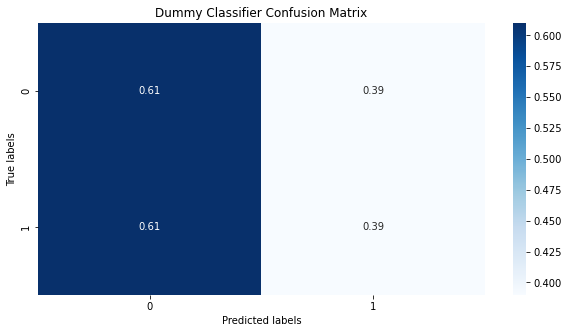

In [570]:
plot_confusion_matrix(y_test, dummy_y_pred, 'Dummy Classifier', normalize = True)

### Testing ROC curve

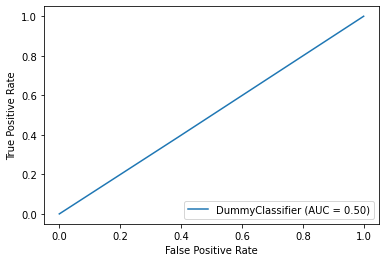

In [571]:
plot_roc_curve(dummy_clf, X_test, y_test)

### Testing Precision - Recall Curve

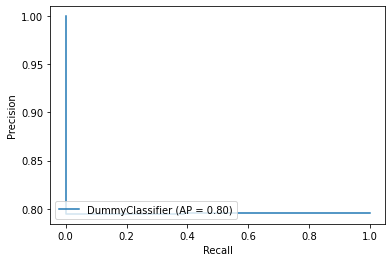

In [572]:
plot_precision_recall_curve(dummy_clf, X_test, y_test)

# 5.7.2 Logistic Regression<a id='5.7.2_Logistic_Regression'></a>
[Table of Contents](#5.1_Contents)

This model is the most interpretable of all of the advanced models and it performs decently well, catching 64% of defaulted loans on the test set. The overall accuracy and f1 score are also significantly better than the dummy classifier.

In [573]:
clf_y_pred = clf.predict(X_test)

### Testing Classification Report

In [574]:
print(classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

           0       0.34      0.64      0.44     85512
           1       0.88      0.68      0.77    332449

    accuracy                           0.67    417961
   macro avg       0.61      0.66      0.60    417961
weighted avg       0.77      0.67      0.70    417961



### Testing Confusion Matrix

Normalized confusion matrix


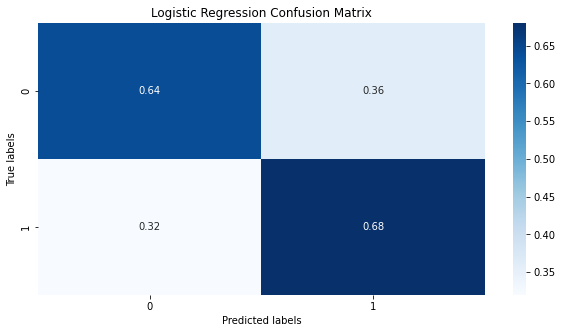

In [575]:
plot_confusion_matrix(y_test, clf_y_pred, 'Logistic Regression', normalize = True)

### Testing ROC curve

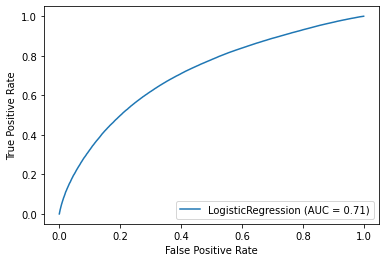

In [576]:
plot_roc_curve(clf, X_test, y_test)

### Testing Precision - Recall Curve

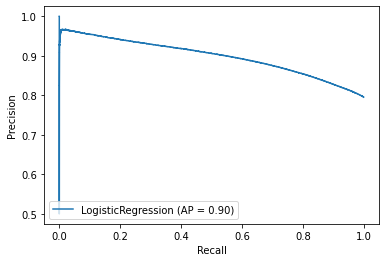

In [577]:
plot_precision_recall_curve(clf, X_test, y_test)

# 5.7.3 Gini Decision Tree<a id='5.7.3_Gini_Decision_Tree'></a>
[Table of Contents](#5.1_Contents)

This model ranks above the dummy classifier and below the logistic regression. At a depth of 10 levels, it is interpretable but more complex than the logistic regression. It identifed 55% of defaulted loans, but also performs well with the non-defaulted class - a trade off.

In [578]:
gini_y_pred = gini_tree.predict(X_test)

### Testing Classification Report

In [579]:
print(classification_report(y_test, gini_y_pred))

              precision    recall  f1-score   support

           0       0.35      0.55      0.43     85512
           1       0.86      0.73      0.79    332449

    accuracy                           0.70    417961
   macro avg       0.61      0.64      0.61    417961
weighted avg       0.76      0.70      0.72    417961



### Testing Confusion Matrix

Normalized confusion matrix


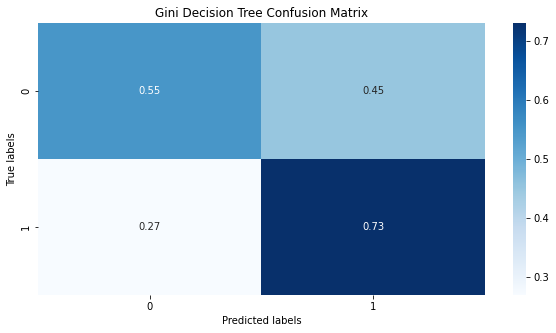

In [580]:
plot_confusion_matrix(y_test, gini_y_pred, 'Gini Decision Tree', normalize = True)

### Testing ROC curve

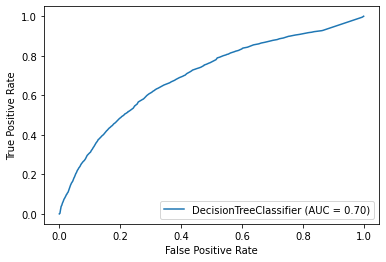

In [581]:
plot_roc_curve(gini_tree, X_test, y_test)

### Testing Precision - Recall Curve

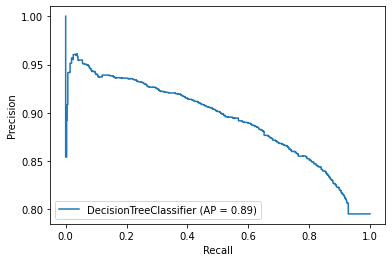

In [582]:
plot_precision_recall_curve(gini_tree, X_test, y_test)

# 5.7.4 Entropy Decision Tree<a id='5.7.4_Entropy_Decision_Tree'></a>
[Table of Contents](#5.1_Contents)

This decision tree was better than the Gini tree, but still more complicated than the logistic regression since this model also has 10 levels. However, it produces the highest recall score, identifying 71% of defaulted loans.

In [583]:
entropy_y_pred = entropy_tree.predict(X_test)

### Testing Classification Report

In [584]:
print(classification_report(y_test, entropy_y_pred))

              precision    recall  f1-score   support

           0       0.32      0.71      0.44     85512
           1       0.89      0.60      0.72    332449

    accuracy                           0.63    417961
   macro avg       0.60      0.66      0.58    417961
weighted avg       0.77      0.63      0.66    417961



### Testing Confusion Matrix

Normalized confusion matrix


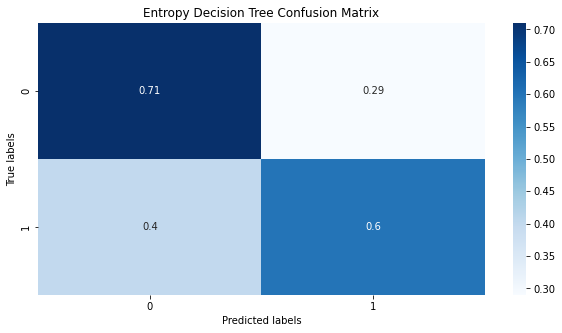

In [585]:
plot_confusion_matrix(y_test, entropy_y_pred, 'Entropy Decision Tree', normalize = True)

### Testing ROC curve

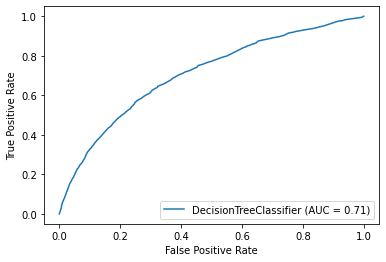

In [586]:
plot_roc_curve(entropy_tree, X_test, y_test)

### Testing Precision - Recall Curve

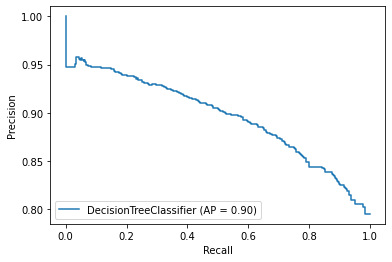

In [587]:
plot_precision_recall_curve(entropy_tree, X_test, y_test)

# 5.7.5 Gradient Boosting Classifier<a id='5.7.5_Gradient_Boosting_Classifier'></a>
[Table of Contents](#5.1_Contents)

This model had the greatest overall accuracy, but the lowest recall score among the advanced models, identifying 50% of defaulted loans.

In [588]:
gb_y_pred = gb.predict(X_test)

### Testing Classification Report

In [589]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.37      0.50      0.43     85512
           1       0.86      0.79      0.82    332449

    accuracy                           0.73    417961
   macro avg       0.62      0.64      0.62    417961
weighted avg       0.76      0.73      0.74    417961



### Testing Confusion Matrix

Normalized confusion matrix


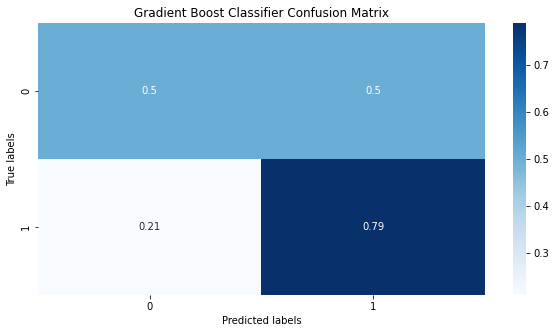

In [590]:
plot_confusion_matrix(y_test, gb_y_pred, 'Gradient Boost Classifier', normalize = True)

### Testing ROC curve

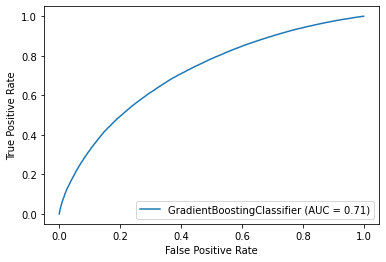

In [591]:
plot_roc_curve(gb, X_test, y_test)

### Testing Precision - Recall Curve

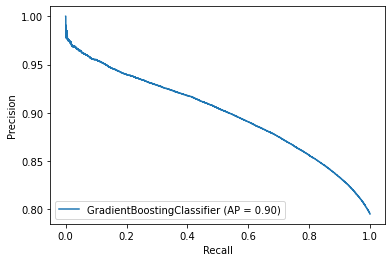

In [592]:
plot_precision_recall_curve(gb, X_test, y_test)

# 5.8 Model Selection<a id='5.8_Model_Selection'></a>
[Table of Contents](#5.1_Contents)

With this application, there are two primary considerations with selecting a model:

1) The model must be interpretable for compliance with regulation and audits.
2) The model should identify as many applicants that are likely to default as possible (recall score).

With these two considerations in mind, I believe that the logistic regression model is the best choice. It can be explained mathematically and the top-contributing features are easily explained. It also strikes a good balance between the recall score of the defaulted class (64% of defaulted loans identified) and the precision score of the non-defaulted class (88% of predicted non-default loans were truly non-default). Among all the advanced classifiers, the ROC and precision-recall curves showed similar performance. The logistic regression model was optimized with Randomized Search cross validation and uses no penalty, a class weight ratio of 2.03:1 (default:non-default), and an inverse regularization stength of 3.5.

Naturally, there is room for improvement in the performance of the logistic regression. However, there is a limit to the predictive power of the selected features - more powerful features would need to be obtained from hard credit checks of applicants. The top positive features contributing to the logistic regression (in order) are:

1. Home ownership
2. Loan Purpose
3. Employment Length
4. Installment Payments
5. Total Credit Limit
6. Annual Income
7. FICO score

Loan amount, interest rate, and months since last credit pull had a negative contribution towards the prediction.

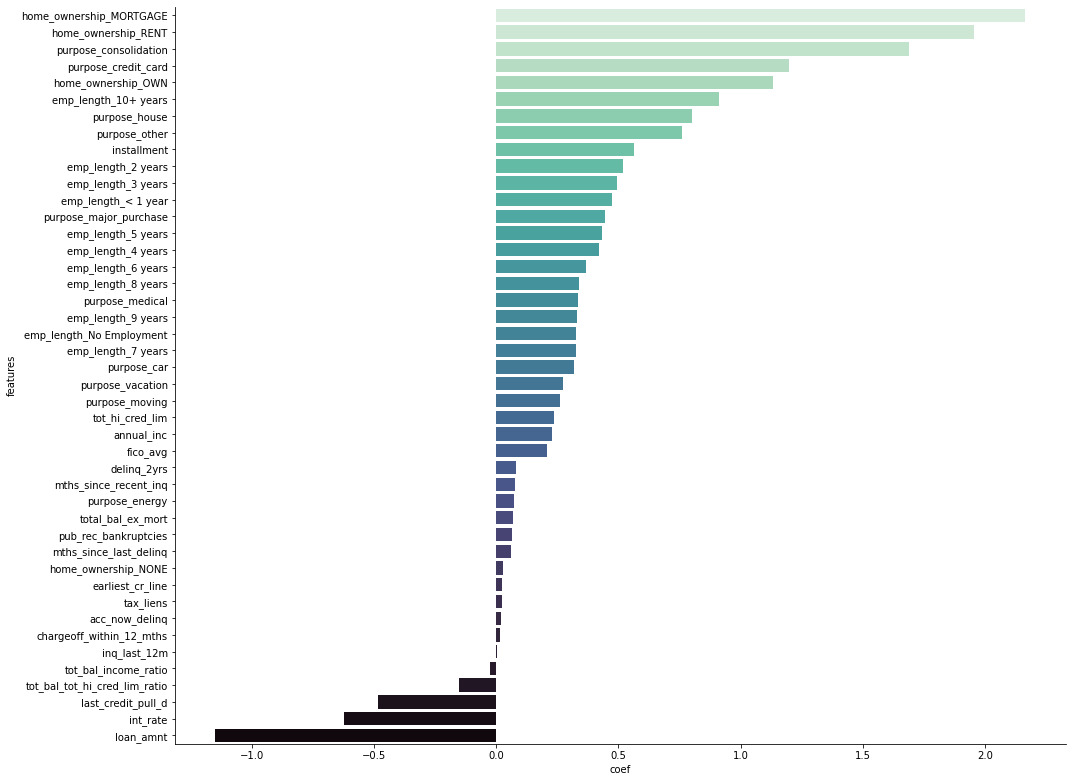

In [593]:
ax = sns.catplot(x="coef", y="features", data=logreg_features, palette = 'mako_r', kind = 'bar', aspect = 3)
ax.fig.set_figheight(12)

# 5.9 Data Quantity Assessment<a id='5.9_Data_Quantity_Assessment'></a>
[Table of Contents](#5.1_Contents)

The plot below does seem to suggest that increasing the quantity of the training set would only marginally improve the training recall scores. It might be more efficient to allocate resources towards feature engineering instead.

In [594]:
fractions = [.05, .1, .25, .5, .6, .7, .8, .9, .95, .97, 1.0]
train_size, train_scores, test_scores = learning_curve(clf, X_train, y_train, train_sizes=fractions, scoring = 'recall',
                                                      random_state = 42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

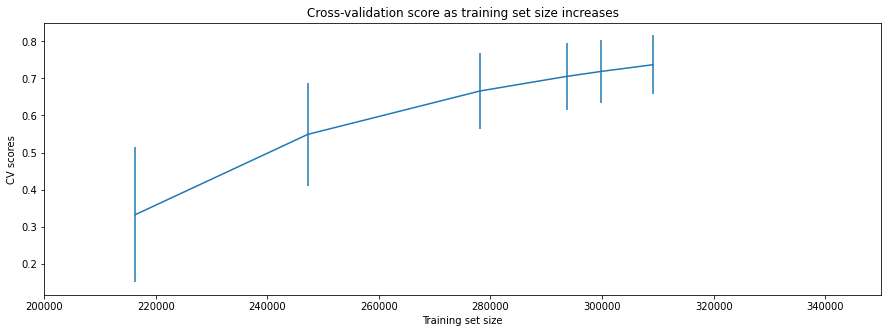

In [595]:
plt.subplots(figsize=(15, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.xlim(200000, 350000)
plt.title('Cross-validation score as training set size increases');

# 5.10 Export<a id='5.10_Export'></a>
[Table of Contents](#5.1_Contents)

In [596]:
best_model = clf
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [597]:
# save the model

# modelpath = 
# save_file(best_model, 'loan_default_logreg_model.pkl', modelpath)